When the observations are more accurate than 1.0 I, (say cov <1.0 I), then 1.0I  gives a better filtering in
the sense that the experiment does not fail. Ob 4 has the cases when the assimilations are sustained for all time
without failing, for such cases as they have been assimilated with 1.0 I as the assumed observation covariance.
(which is over estimating the observation covariance).

This could be useful when your goal is filtering, not forecasting.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import seaborn as sns
from cmcrameri import cm

mpl.rcParams['lines.markersize']=10
mpl.rcParams['axes.titlesize']=30
mpl.rcParams['legend.fontsize']=20
mpl.rcParams['xtick.labelsize']=15
mpl.rcParams['ytick.labelsize']=15
mpl.rcParams['axes.labelsize']=20

In [46]:
# Change here for different observation gap and observation covariance parameter
mu=1.0
ob_gap=0.05
k=4
N=40 
loc_fun='gaspri'
l_scale=4
alpha=1.0
ob_dim=20
ecov=1.0 

ebias=4.0     


os.chdir('/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96/L96-40')

#load the state
state=np.load('state/Multiple_trajectories_N=1_gap=0.05_ti=0.0_tf=500.0_dt_0.05_dt_solver=0.01.npy')


# State and obs
os.chdir('..')
os.chdir(os.getcwd()+'/assimilation/ob{}'.format(k)) 
obs=np.load('ob{}_gap_{}_H2__mu={}_obs_cov1.npy'.format(k,ob_gap,mu))

#Go inside the data folder......................................
folder_label='ebias={}_ecov={}_obs={}_ens={}_mu={}_gap={}_alpha={}_loc=gaspri_r={}'.format(ebias, ecov,ob_dim,N,mu,ob_gap,alpha,l_scale)
print(os.getcwd())
os.chdir(folder_label)

#Load data....
a_ens=np.load('filtered_ens.npy') #ens has shape:=[time steps,system dimension,ensemble number]
a_mean=np.mean(a_ens,axis=2)

/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96/assimilation/ob4


In [54]:
# Change here for different observation gap and observation covariance parameter
mu=0.3
ob_gap=0.05
k=4
N=40 
loc_fun='gaspri'
l_scale=4
alpha=1.0
ob_dim=20
ecov=1.0 
ebias=4.0     


os.chdir('/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96')


# State and obs
os.chdir(os.getcwd()+'/assimilation/ob{}'.format(k)) 
obs=np.load('ob{}_gap_{}_H2__mu={}_obs_cov1.npy'.format(k,ob_gap,mu))

#Go inside the data folder......................................
folder_label='ebias={}_ecov={}_obs={}_ens={}_mu={}_gap={}_alpha={}_loc=gaspri_r={}'.format(ebias, ecov,ob_dim,N,mu,ob_gap,alpha,l_scale)
print(os.getcwd())
os.chdir(folder_label)

#Load data....
a1_ens=np.load('filtered_ens.npy') #ens has shape:=[time steps,system dimension,ensemble number]
a1_mean=np.mean(a1_ens,axis=2)

/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96/assimilation/ob4


In [43]:
# os.chdir('/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96/L96-40/assimilated_trajs/')
# os.mkdir('mu={}_times_I20'.format(mu))
# os.chdir('mu={}_times_I20'.format(mu))
# np.save('filter_mean.npy',a1_mean)         

In [44]:
time=ob_gap*np.arange(a_mean.shape[0])

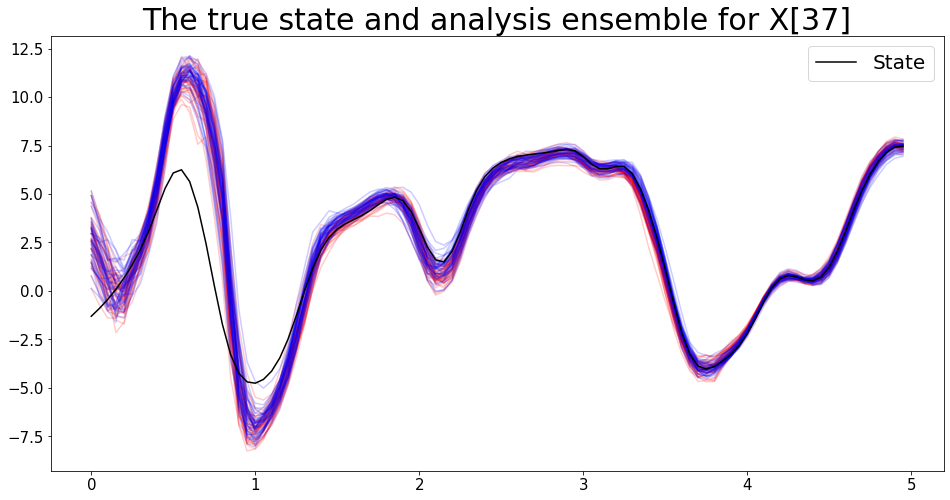

In [45]:
plt.figure(figsize=(16,8))
# Start time and end time chosen to view a part of time series
t_start=0
t_stop=100
# component to view
comp_=37
#plt.plot(time[t_start:t_stop],a1_mean[t_start:t_stop,comp_],c='r',alpha=1)

plt.plot(time[t_start:t_stop],a_ens[t_start:t_stop,comp_],c='r',alpha=0.2)
plt.plot(time[t_start:t_stop],a1_ens[t_start:t_stop,comp_],c='blue',alpha=0.2)
plt.plot(time[t_start:t_stop],state[t_start:t_stop,comp_],c='black',label='State')
if (comp_%2==0):
    #plt.scatter(time[t_start:t_stop],obs[t_start:t_stop,int(comp_/2)],c='black',edgecolors='black',marker='.',s=150,label='obs')
    plt.errorbar(x=time[t_start:t_stop],y=obs[t_start:t_stop,int(comp_/2)],yerr=mu,c='g',mec='black',mfc='g',capsize=4,fmt='.',ms=13)
plt.legend()

plt.title(r'The true state and analysis ensemble for X[{}]'.format(comp_))
#plt.xticks(time[t_start:t_stop],fontsize=12)
plt.legend(frameon='True')
#plt.savefig('overfit_2.png')

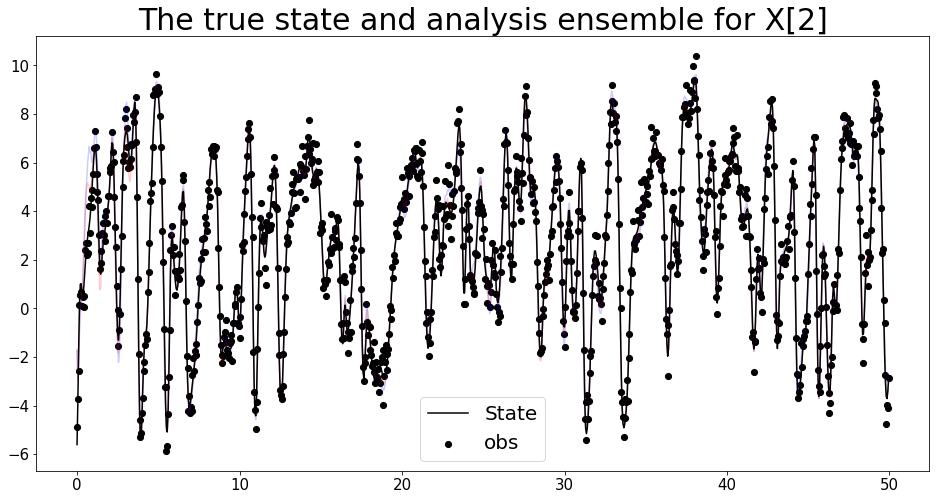

In [58]:
plt.figure(figsize=(16,8))
# Start time and end time chosen to view a part of time series
t_start=0
t_stop=1000
# component to view
comp_=2
#plt.plot(time[t_start:t_stop],a_mean[t_start:t_stop,comp_],c='r',alpha=1)

plt.plot(time[t_start:t_stop],a_mean[t_start:t_stop,comp_],c='blue',alpha=0.2)
plt.plot(time[t_start:t_stop],a1_mean[t_start:t_stop,comp_],c='red',alpha=0.2)
plt.plot(time[t_start:t_stop],state[t_start:t_stop,comp_],c='black',label='State')
if (comp_%2==0):
    plt.scatter(time[t_start:t_stop],obs[t_start:t_stop,int(comp_/2)],c='black',edgecolors='black',marker='.',s=150,label='obs')
    
plt.legend()
plt.title(r'The true state and analysis ensemble for X[{}]'.format(comp_))
#plt.xticks(time[t_start:t_stop],fontsize=12)
plt.legend(frameon='True')
#plt.savefig('/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96/stability_2.png')

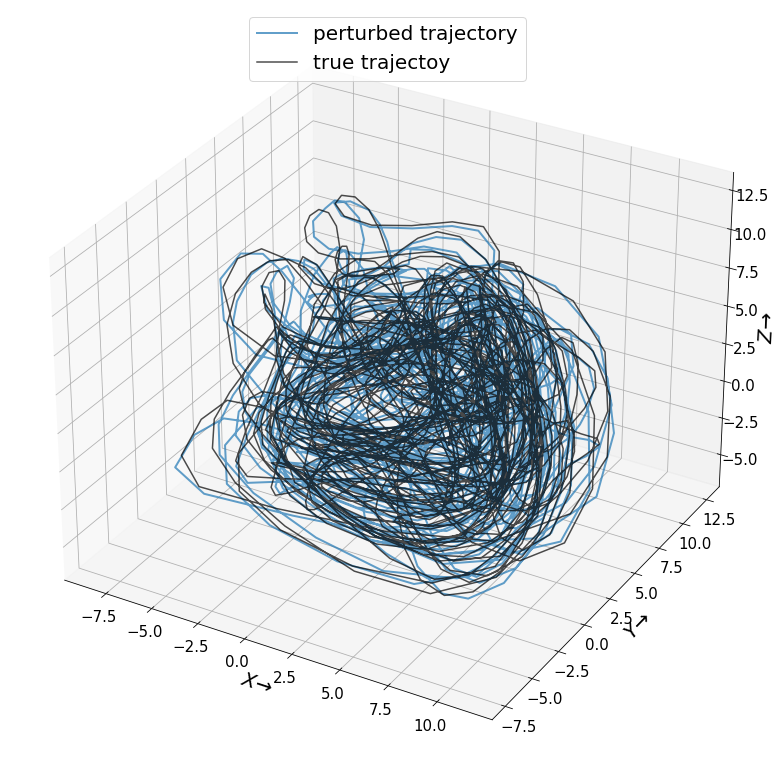

In [11]:
#plot the state and the trajectory
fig = plt.figure(figsize=(14,14))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# plotting
ax.plot3D(a_mean[1000:3000,0],a_mean[1000:3000,1],a_mean[1000:3000,2],label='perturbed trajectory',alpha=0.7,linestyle='-',lw=2)
ax.plot3D(state[1000:3000,0],state[1000:3000,1],state[1000:3000,2],label='{}'.format('true trajectoy'),c='black',alpha=0.7)

ax.set_xlabel(r'$X\to$')
ax.set_ylabel(r'$Y\to$')
ax.set_zlabel(r'$Z\to$')
plt.legend(loc='upper center')
#os.chdir('/home/shashank/Dropbox/Data_Assimilation/Thesis_writing/figures')
#plt.savefig('/home/shashank/Dropbox/Data_Assimilation/Thesis_writing/figures/perturbed_true.png')

In [125]:
# Limited time plots
x=time[t_start:t_stop]
y1=a1_ens[t_start:t_stop,comp_]
y2=a_ens[t_start:t_stop,comp_]

/home/shashank/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/shashank/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

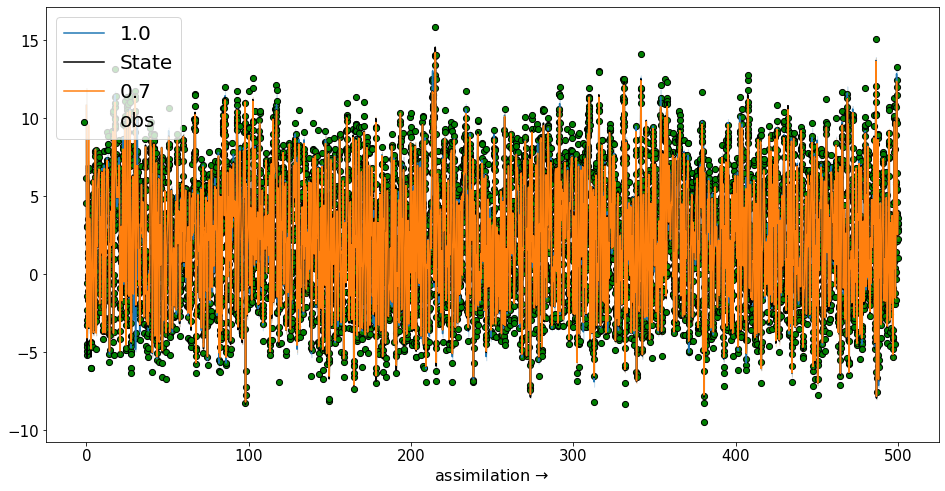

In [126]:
#seaborn lineplot
x_for_lineplot = np.repeat(x,40)
y1_for_lineplot = y1.flatten('C')
y2_for_lineplot = y2.flatten('C')
plt.figure(figsize=(16,8))
sns.lineplot(x_for_lineplot,y1_for_lineplot,label='1.0',ci="sd")
if (comp_%2==0):
    plt.scatter(time[t_start:t_stop],obs[t_start:t_stop,int(comp_/2)],c='g',edgecolors='black',marker='.',s=150,label='obs')
plt.plot(time[t_start:t_stop],state[t_start:t_stop,comp_],c='black',label='State')    
sns.lineplot(x_for_lineplot,y2_for_lineplot,label='0.7',ci="sd")
plt.xlabel(r'assimilation $\to$',fontsize=16)
plt.plot()

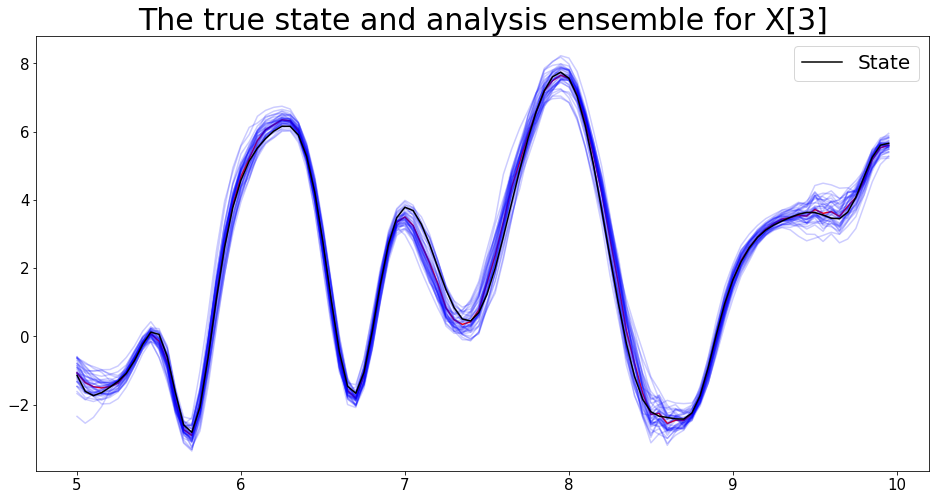

In [83]:
plt.figure(figsize=(16,8))
# Start time and end time chosen to view a part of time series
t_start=100
t_stop=200
# component to view
comp_=3
plt.plot(time[t_start:t_stop],a_mean[t_start:t_stop,comp_],c='r',alpha=1)
plt.plot(time[t_start:t_stop],a_ens[t_start:t_stop,comp_],c='blue',alpha=0.2)
plt.plot(time[t_start:t_stop],state[t_start:t_stop,comp_],c='black',label='State')
if (comp_%2==0):
    plt.scatter(time[t_start:t_stop],obs[t_start:t_stop,int(comp_/2)],c='black',edgecolors='black',marker='.',s=150,label='obs')
plt.legend()
plt.title(r'The true state and analysis ensemble for X[{}]'.format(comp_))
#plt.xticks(time[t_start:t_stop],fontsize=12)
plt.legend(frameon='True')


In [55]:
print(np.sqrt(np.mean(np.sum((state[t_start+500:t_stop]-a1_mean[t_start+500:t_stop])**2,axis=1),axis=0)/40))

0.21500921915907203


min_rmse 0.9349987586462905
max_rmse 2.283821672351584


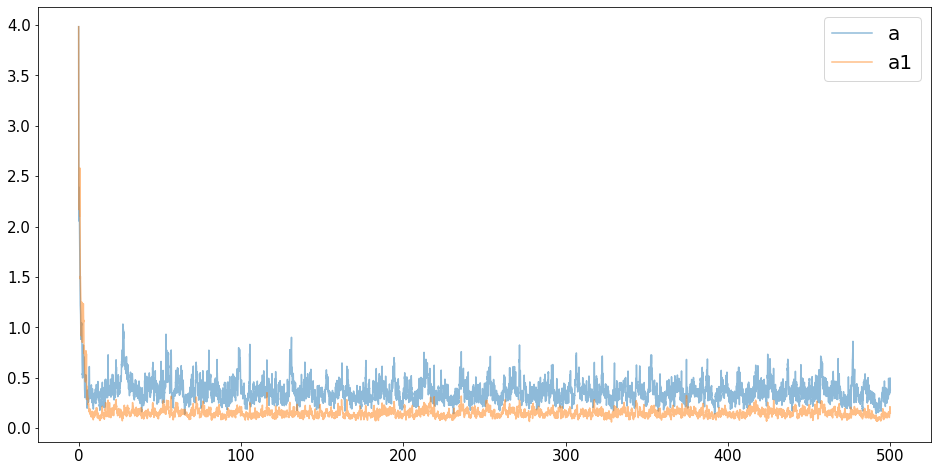

In [47]:
plt.figure(figsize=(16,8))
t_start=0
t_stop=10000
plt.plot(time[t_start:t_stop],np.sqrt(np.sum((state[t_start:t_stop]-a_mean[t_start:t_stop])**2,axis=1))/np.sqrt(40),linestyle='solid',alpha=0.5,label='a')
plt.plot(time[t_start:t_stop],np.sqrt(np.sum((state[t_start:t_stop]-a1_mean[t_start:t_stop])**2,axis=1))/np.sqrt(40),linestyle='solid',alpha=0.5,label='a1')
print('min_rmse',np.mean(np.sqrt(np.sum((state[t_start+1000:t_stop]-a1_mean[t_start+1000:t_stop])**2,axis=1))))
print('max_rmse',np.mean(np.sqrt(np.sum((state[t_start+1000:t_stop]-a_mean[t_start+1000:t_stop])**2,axis=1))))
plt.legend()

In [164]:
sn=np.zeros((a_ens.shape[0],2))
for i in range(a_ens.shape[0]):
    sn[i,0]=np.sqrt(np.trace(np.cov(a_ens[i],rowvar=True))/40)
    sn[i,1]=np.sqrt(np.trace(np.cov(a1_ens[i],rowvar=True))/40)

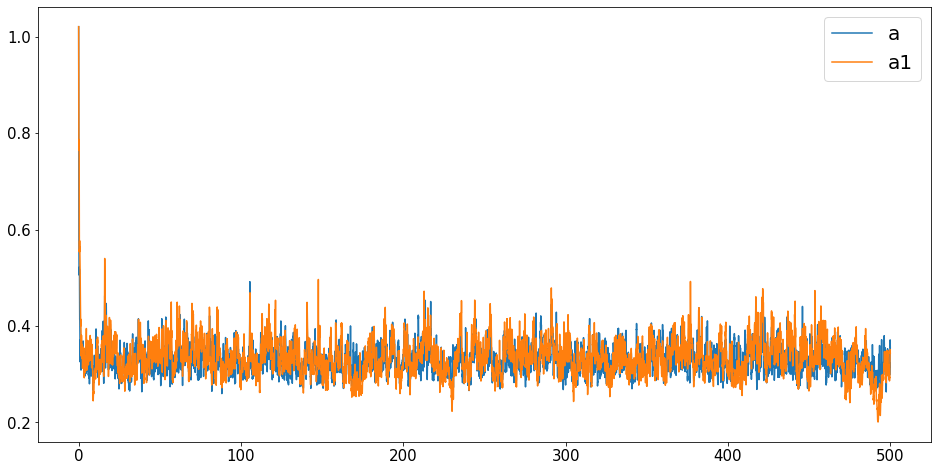

In [165]:
plt.figure(figsize=(16,8))

plt.plot(time[t_start:t_stop],sn[t_start:t_stop,0],label='a')
plt.plot(time[t_start:t_stop],sn[t_start:t_stop,1],label='a1')
plt.legend()

In [ ]:
# Difference between an assimilated trajectory and a noisy trajectory

The case of overfitting for the observation inflation 1.01 for ob5 case in <1.0I cases.
